###  Text Data 

### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

### Importing required libraries for NLP

In [2]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer

In [3]:
data = pd.read_csv("NLP.csv")
data.head()

,Help_num,Help_dem,Score,Text
0,1,1,5,I have bought several of the Vitality canned ...
1,0,0,1,Product arrived labeled as Jumbo Salted Peanu...
2,1,1,4,This is a confection that has been around a f...
3,3,3,2,If you are looking for the secret ingredient ...
4,0,0,5,Great taffy at a great price. There was a wi...


In [4]:
data.shape

(276836, 4)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276836 entries, 0 to 276835
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Help_num  276836 non-null  int64 
 1   Help_dem  276836 non-null  int64 
 2   Score     276836 non-null  int64 
 3   Text      276836 non-null  object
dtypes: int64(3), object(1)
memory usage: 8.4+ MB


In [6]:
data.Score.value_counts()

5    189746
4     43257
1     27785
2     16048
Name: Score, dtype: int64

###  Exploratory Data Analysis

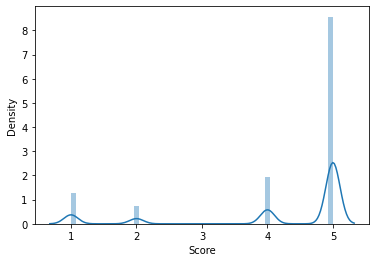

In [7]:
sns.distplot(data.Score);

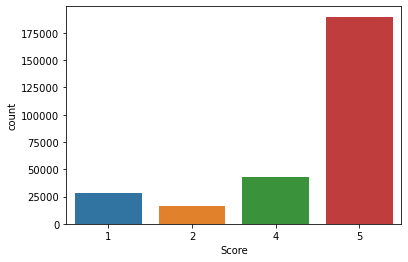

In [8]:
sns.countplot(data.Score);

### Changing Taraget varible to Positive or Negetive

In [9]:
my_dict = {5:"Positive",4:"Positive",2:"Negitive",1:"Negitive"}

In [10]:
data.head()

,Help_num,Help_dem,Score,Text
0,1,1,5,I have bought several of the Vitality canned ...
1,0,0,1,Product arrived labeled as Jumbo Salted Peanu...
2,1,1,4,This is a confection that has been around a f...
3,3,3,2,If you are looking for the secret ingredient ...
4,0,0,5,Great taffy at a great price. There was a wi...


In [11]:
data["Score"] = data["Score"].apply(lambda x: my_dict[x])

In [12]:
data.head()

,Help_num,Help_dem,Score,Text
0,1,1,Positive,I have bought several of the Vitality canned ...
1,0,0,Negitive,Product arrived labeled as Jumbo Salted Peanu...
2,1,1,Positive,This is a confection that has been around a f...
3,3,3,Negitive,If you are looking for the secret ingredient ...
4,0,0,Positive,Great taffy at a great price. There was a wi...


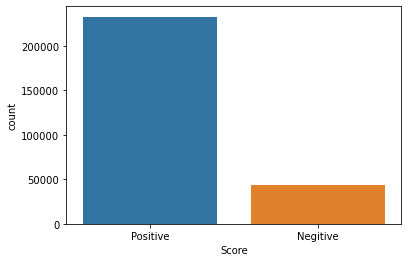

In [14]:
sns.countplot(data.Score);

#####                We have imbalnced Data, so instead of random sampling we use startified sampling

In [15]:
data.Score.value_counts()

Positive    233003
Negitive     43833
Name: Score, dtype: int64

### Spliting into X and y

In [16]:
X= data[["Text"]]
y = data["Score"]

### split into train and test

In [29]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=143,stratify=y )

In [30]:
print(X_train.shape,y_train.shape)
print( X_test.shape, y_test.shape)


(193785, 1) (193785,)
(83051, 1) (83051,)


###  Text Preprocessing

In [33]:
from tqdm import tqdm
tqdm.pandas()

In [34]:
stopword = stopwords.words("english")

In [35]:
stopword.remove("not")

In [37]:
def preprocess(raw_text):
    lemma = WordNetLemmatizer()
    sentence = re.sub("[^a-zA-Z]", " ", raw_text)
    sentence = sentence.lower()

    tokens = sentence.split()          
    clean_tokens = [t for t in tokens if not t in stopwords.words("english")]
    clean_tokens = [lemma.lemmatize(word) for word in clean_tokens]
    
    return pd.Series([" ".join(clean_tokens)])

In [38]:
X_train_transformed = X_train["Text"].progress_apply(lambda x: preprocess(x))

100%|████████████████████████████████████████████████████████████████████████| 193785/193785 [1:17:54<00:00, 41.45it/s]


####  Before preprocessing text

In [39]:
X_train.head()

,Text
104314,I'm not thrilled to learn these come from Chi...
15691,"This was my favorite candy as a child; thus, ..."
142501,I have had these Feodora Katzenzungen as a ch...
227076,I really do like the Classico sauce collectio...
149508,I had been searching on and off for this prod...


####  After Preprocessing text

In [40]:
X_train_transformed.head()

,0
104314,thrilled learn come china dogswell say check p...
15691,favorite candy child thus remember well presen...
142501,feodora katzenzungen child adulthood wonderful...
227076,really like classico sauce collection however ...
149508,searching product long time vanished shelf muc...


###  conv text to BOW of Train Data

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

In [43]:
vec = CountVectorizer()
vec.fit(X_train_transformed[0])
X_train_bow = vec.transform(X_train_transformed[0])

In [44]:
X_train_bow

<193785x58207 sparse matrix of type '<class 'numpy.int64'>'
	with 5787896 stored elements in Compressed Sparse Row format>

In [45]:
print("Total unique words:", len(vec.vocabulary_))

print("Type of train features:", type(X_train_bow))

print("Shape of input data:", X_train_bow.shape)

Total unique words: 58207
Type of train features: <class 'scipy.sparse.csr.csr_matrix'>
Shape of input data: (193785, 58207)


### Preparing Test Data

In [46]:
X_test.head()

,Text
189914,I got these to give out in a goodie bag for t...
168989,"My little dog wouldn't even lick it, she isn'..."
21329,My dogs love these. This was a great buy for ...
215090,Aerated chocolates are quite popular in the r...
116879,"Honestly, I really enjoy this product. B6 an..."


In [48]:
X_test_transformed = X_test['Text'].progress_apply(lambda x: preprocess(x))

X_test_transformed.head()

100%|████████████████████████████████████████████████████████████████████████████| 83051/83051 [41:24<00:00, 33.43it/s]


,0
189914,got give goodie bag holiday couple extra cours...
168989,little dog even lick going even get close bewa...
21329,dog love great buy price quite expensive store...
215090,aerated chocolate quite popular rest world see...
116879,honestly really enjoy product b b great boosti...


In [49]:
X_test_bow = vec.transform(X_test_transformed[0])

In [90]:
X_test_bow

<83051x58207 sparse matrix of type '<class 'numpy.int64'>'
	with 2472230 stored elements in Compressed Sparse Row format>

In [51]:
print("Total unique words:", len(vec.vocabulary_))

print("Type of train features:", type(X_test_bow))

print("Shape of input data:", X_test_bow.shape)

Total unique words: 58207
Type of train features: <class 'scipy.sparse.csr.csr_matrix'>
Shape of input data: (83051, 58207)


##  Applying Model

### Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_bow, y_train)

LogisticRegression()

In [75]:
classifier.score(X_train_bow, y_train)

0.9479319864798617

In [76]:
y_train_pred = classifier.predict(X_test_bow)

In [77]:
accuracy_score(y_test, y_train_pred)

0.92770707155844

In [93]:
temp_df = pd.DataFrame({"actual":y_test,"pred":y_train_pred})

In [96]:
temp_df.head()

,actual,pred
189914,Positive,Positive
168989,Negitive,Negitive
21329,Positive,Positive
215090,Positive,Positive
116879,Positive,Positive


In [79]:
from sklearn.metrics import accuracy_score, classification_report


print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

    Negitive       0.82      0.70      0.75     13150
    Positive       0.94      0.97      0.96     69901

    accuracy                           0.93     83051
   macro avg       0.88      0.83      0.86     83051
weighted avg       0.92      0.93      0.93     83051



###  Naive Bayes

In [80]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_bow,y_train)

MultinomialNB()

In [81]:
nb.score(X_train_bow,y_train)

0.916753102665325

In [82]:
y_test_pred_nb = nb.predict(X_test_bow)

In [83]:
accuracy_score(y_test, y_test_pred_nb)

0.9055399694163827

###  Saving the Model

In [85]:
from pickle import dump

In [86]:
dump(classifier, open('model/log_model.pkl', 'wb'))

### We will check model in nxt notebook